In [2]:
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt

In [153]:
diamonds = data('diamonds')
cut_control_diamonds = diamonds[(diamonds['carat'] > 1.5)&(diamonds['carat'] < 1.75)&(diamonds['color'] == 'D')&(diamonds['clarity'].isin(['SI1', 'SI2']))]

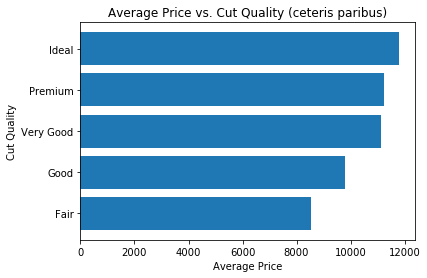

In [168]:
cut_prices = cut_control_diamonds.groupby('cut').mean().sort_values('price')['price']
plt.barh(range(len(cut_prices.index)), cut_prices)
plt.yticks(range(len(cut_prices.index)), cut_prices.index)
plt.title("Average Price vs. Cut Quality (ceteris paribus)")
plt.ylabel("Cut Quality")
plt.xlabel("Average Price")
plt.show()

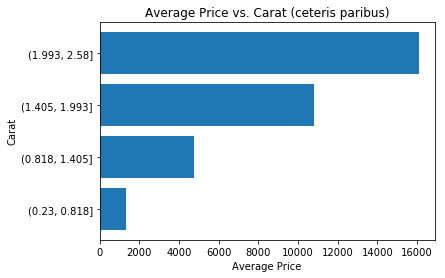

In [169]:
carat_control_diamonds = diamonds[(diamonds['cut'].isin(['Very Good', 'Good']))&(diamonds['color'] == 'D')&(diamonds['clarity'].isin(['SI1', 'SI2']))]
carat_prices = carat_control_diamonds.groupby(pd.cut(carat_control_diamonds['carat'], np.linspace(carat_control_diamonds['carat'].min(), carat_control_diamonds['carat'].max(), 5))).mean().sort_values('price')['price']
plt.barh(range(len(carat_prices.index)), carat_prices)
plt.yticks(range(len(carat_prices.index)), carat_prices.index)
plt.title("Average Price vs. Carat (ceteris paribus)")
plt.ylabel("Carat")
plt.xlabel("Average Price")
plt.show()

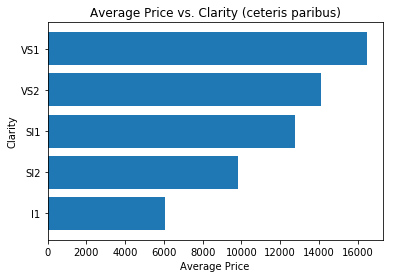

In [171]:
clarity_control_diamonds = diamonds[(diamonds['carat'] > 1.5)&(diamonds['carat'] < 1.75)&(diamonds['cut'].isin(['Very Good', 'Good']))&(diamonds['color'] == 'D')]
clarity_prices = clarity_control_diamonds.groupby('clarity').mean().sort_values('price')['price']
plt.barh(range(len(clarity_prices.index)), clarity_prices)
plt.yticks(range(len(clarity_prices.index)), clarity_prices.index)
plt.title("Average Price vs. Clarity (ceteris paribus)")
plt.ylabel("Clarity")
plt.xlabel("Average Price")
plt.show()

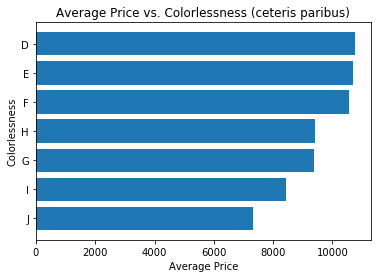

In [172]:
color_control_diamonds = diamonds[(diamonds['carat'] > 1.5)&(diamonds['carat'] < 1.75)&(diamonds['cut'].isin(['Very Good', 'Good']))&(diamonds['clarity'].isin(['SI1', 'SI2']))]
color_prices = color_control_diamonds.groupby('color').mean().sort_values('price')['price']
plt.barh(range(len(color_prices.index)), color_prices)
plt.yticks(range(len(color_prices.index)), color_prices.index)
plt.title("Average Price vs. Colorlessness (ceteris paribus)")
plt.ylabel("Colorlessness")
plt.xlabel("Average Price")
plt.show()

With these graphs, I am attempting to evaluate the '4 Cs' of diamond valuation: color, cut, clarity, and carat. In order to determine what effect each quality has on price, I have created four graphs, each of which controls for three of the Cs and varies the fourth. As expected, diamonds are more expensive when they are clearer (ceteris paribus), more colorless (ceteris paribus), better cut (ceteris paribus), and higher carat (ceteris paribus). The only wrinkle appears in the graph of color variance, in which H is very slightly more expensive than G on average, but only by 0.25 percent which is insignificant and could easily be caused by an outlier.

In [186]:
titanic = pd.read_csv('../titanic.csv')
titanic.loc[:,'Age'] = titanic.loc[:,'Age'].fillna(titanic.loc[:,'Age'].mean())
titanic = titanic.dropna(how='all')
titanic.groupby('Embarked').mean()

In [191]:
titanic.pivot_table('Survived', index=['Embarked'], columns='Sex')

Sex,female,male
Embarked,,
C,0.902655,0.305732
Q,0.616667,0.111111
S,0.680412,0.170144


In [210]:
titanic.pivot_table('Ticket', index=['Sex', 'Embarked'], columns='Pclass', aggfunc='count')

Pclass           1.0  2.0  3.0
Sex    Embarked               
female C          71   11   31
       Q           2    2   56
       S          69   93  129
male   C          70   17   70
       Q           1    5   57
       S         108  149  366

In [202]:
titanic.pivot_table('Survived', index=['Sex'], columns='Pclass')

Pclass,1.0,2.0,3.0
Sex,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130


As you can see, about 62.8% of women who embarked from C were first class, compared to 3.3% from Q and 23.7% from S. Also, passengers from first class were much more likely to survive than their second, and especially their third class counterparts. This is the reason why the survival rate for women from C was so much higher compared to those from Q an S.